In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'../data/dataset.csv')
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

(114000, 21)

In [3]:
df.columns
df = df.drop('Unnamed: 0', axis=1)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [5]:
df.isna()

df.isna().sum()


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df.loc[df['artists'].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
df.duplicated().sum()

np.int64(450)

In [8]:
df.loc[df['track_id'].duplicated(keep=False)].sort_values('track_id', ascending=False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative
91401,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,rock
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,alternative
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul


In [9]:
df['artists'].value_counts()

artists
The Beatles                           279
George Jones                          271
Stevie Wonder                         236
Linkin Park                           224
Ella Fitzgerald                       222
                                     ... 
Hillsong Worship;TAYA;David Ware        1
for KING & COUNTRY;Andy Mineo           1
Bethel Music;Francesca Battistelli      1
Descansa                                1
Jesus Culture                           1
Name: count, Length: 31437, dtype: int64

In [10]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


<Axes: >

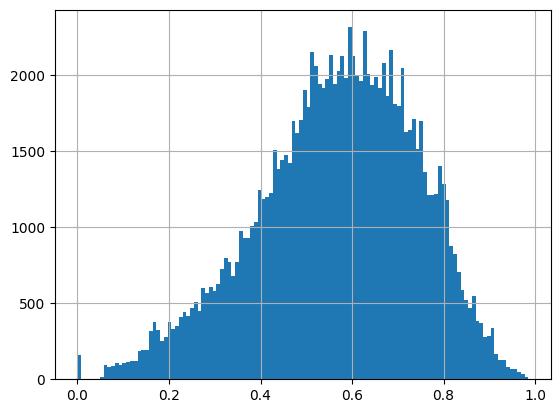

In [11]:
df['danceability'].hist(bins=120)

<Axes: xlabel='danceability'>

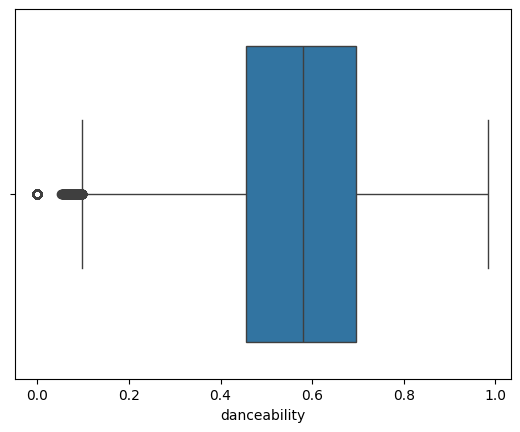

In [12]:
sns.boxplot(x=df['danceability'])

In [13]:
df.columns
df_corr = df[['popularity',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']].corr()
df_corr

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.007101,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
danceability,0.035448,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,0.001056,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.003853,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,0.050423,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,-0.013931,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.044927,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,-0.025472,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138
instrumentalness,-0.095139,0.124371,-0.185606,-0.181879,-0.006823,-0.433477,-0.049955,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330,-0.082580


<Axes: >

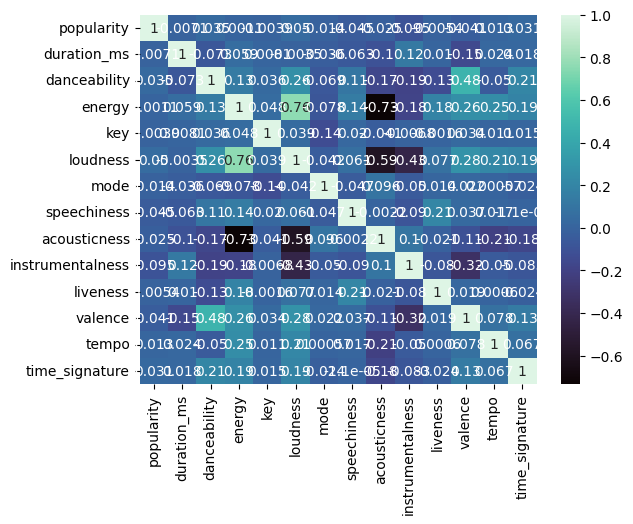

In [14]:
plt, 

sns.heatmap(df_corr, annot=True, cmap='mako')



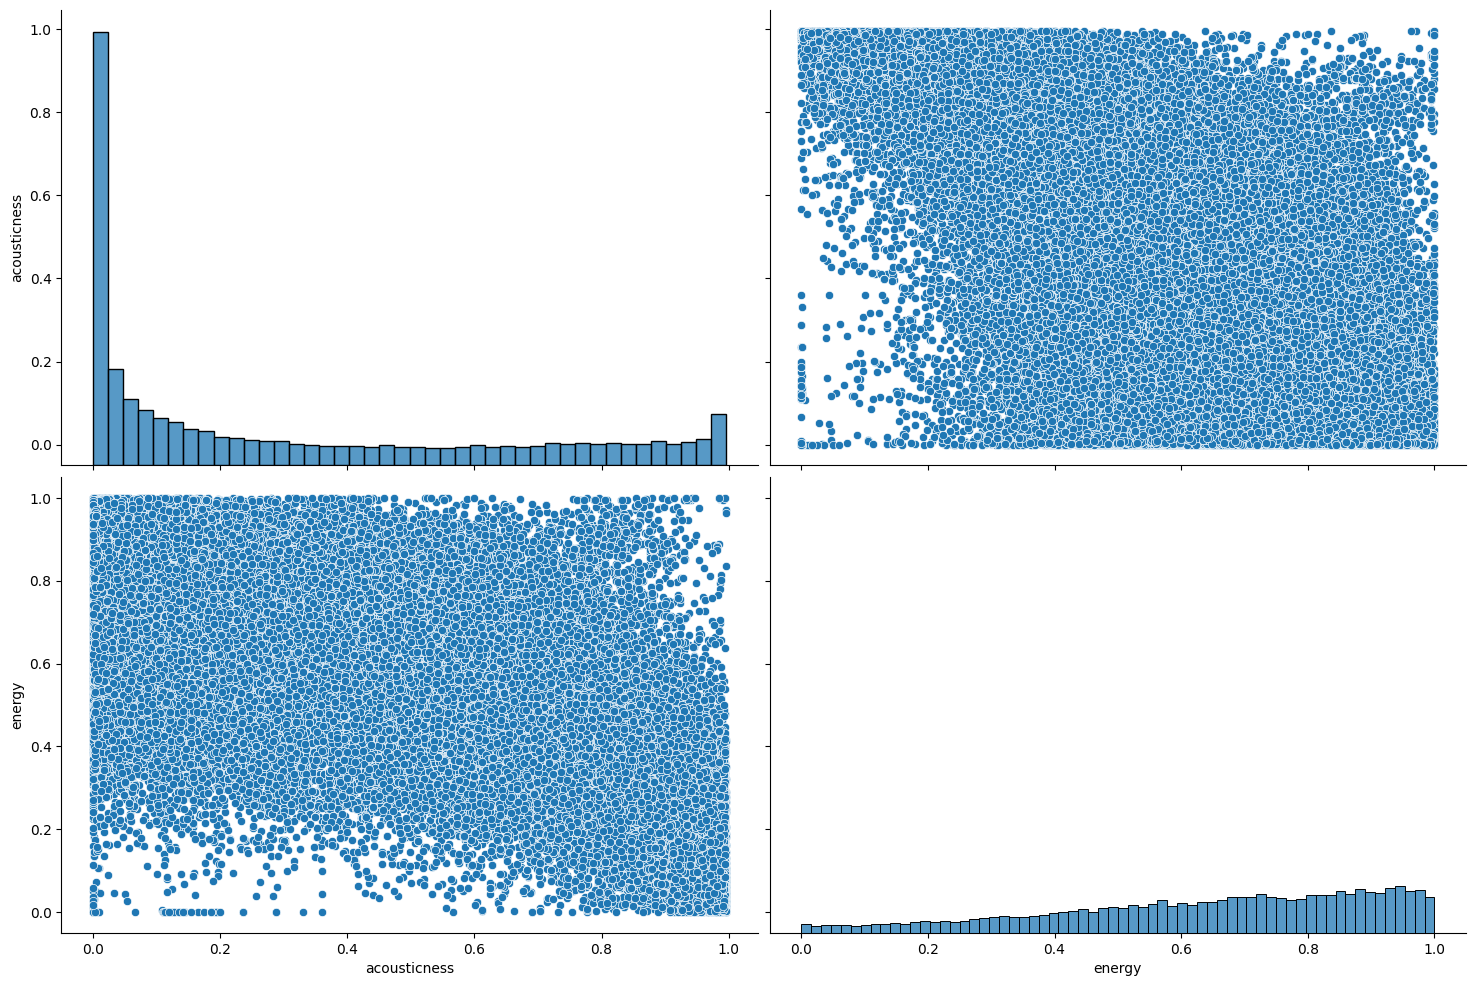

In [15]:
sns.pairplot(df[['acousticness', 'energy']], height=5, aspect=1.5)

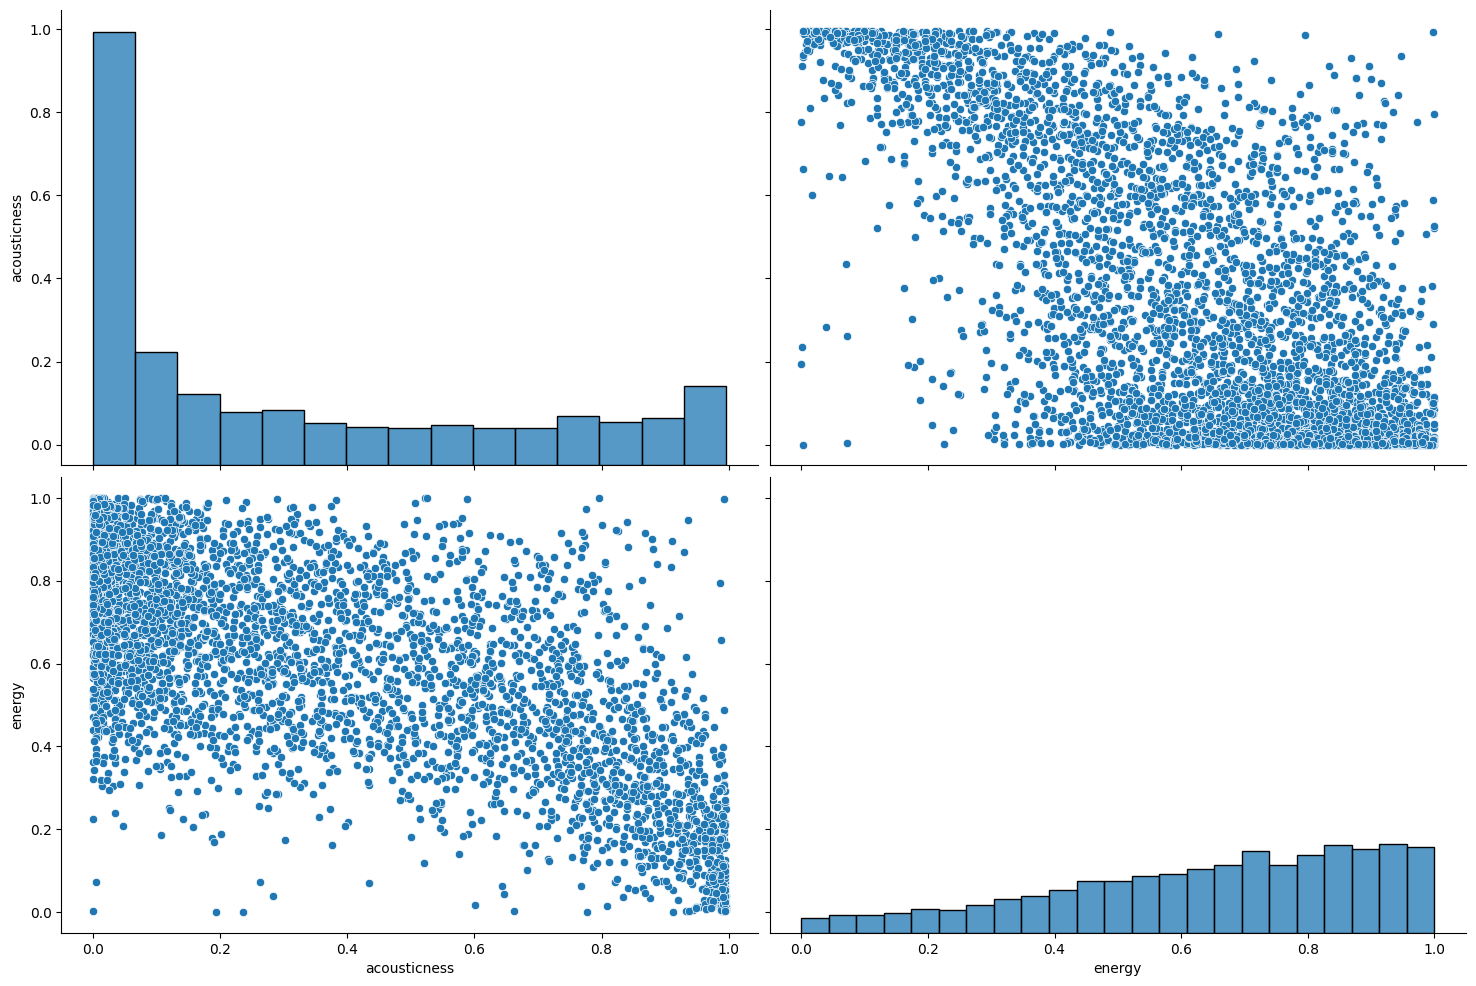

In [16]:
df.sample = df[['acousticness', 'energy']].sample(n=5000, random_state=1)
sns.pairplot(df.sample, height=5, aspect=1.5)

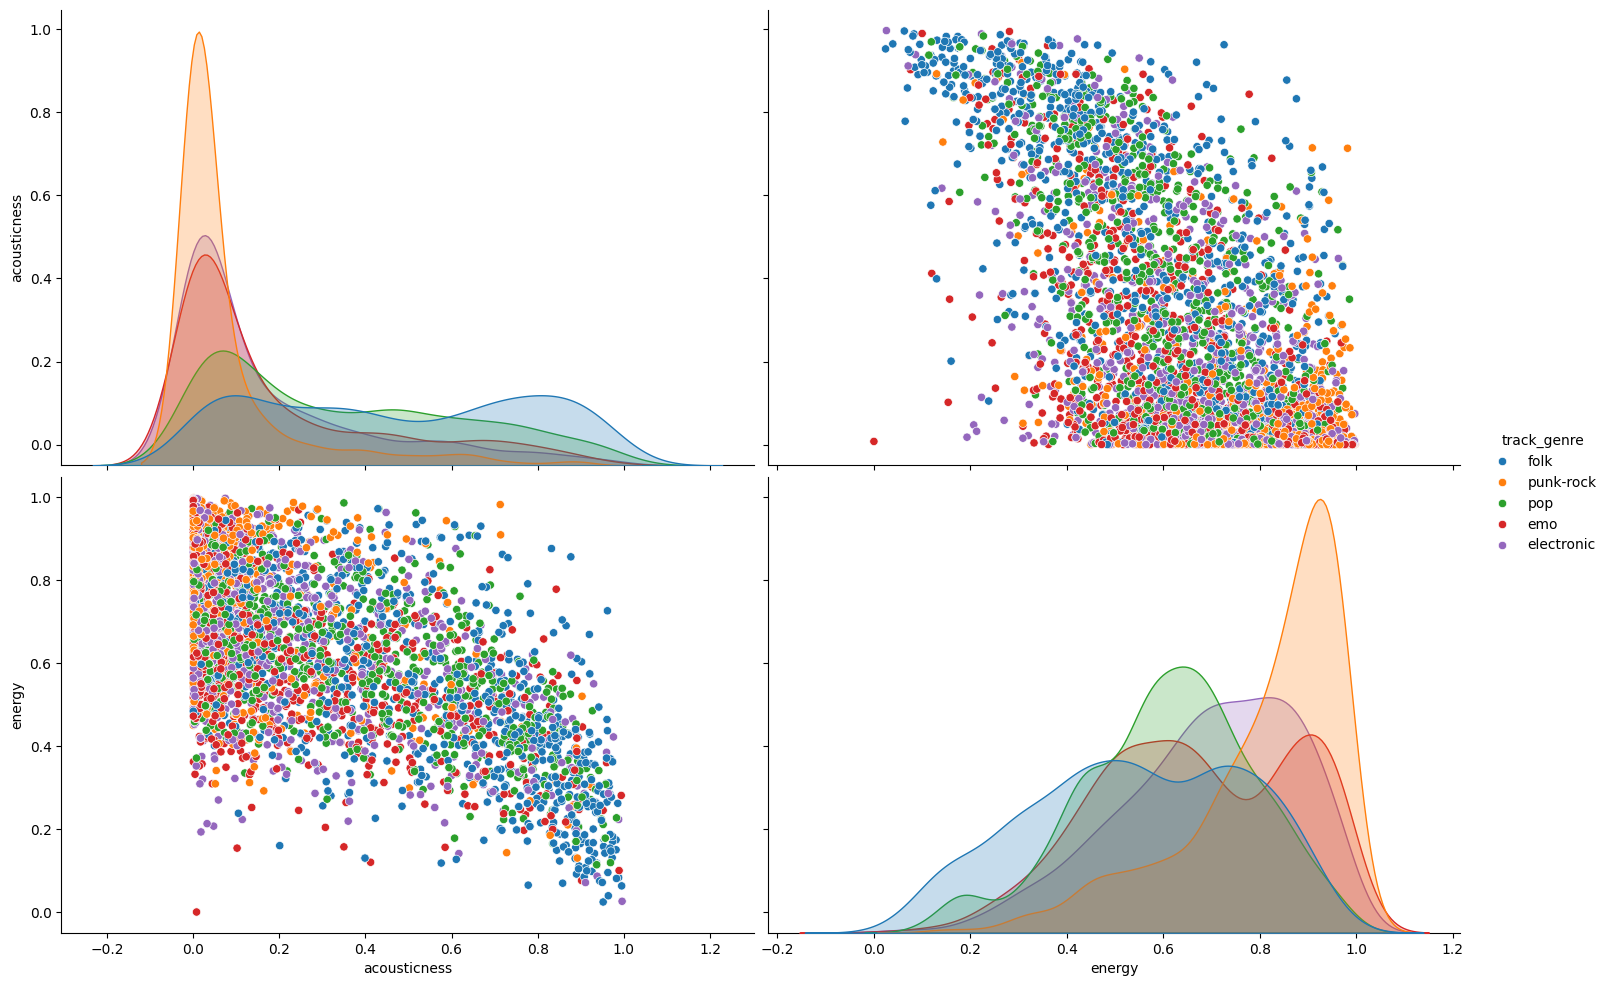

In [22]:
df['track_genre'].value_counts()

df_genres = df[df['track_genre'].isin(['pop', 'folk', 'emo', 'punk-rock', 'electronic'])]

df_sample = df_genres.sample(n=5000, random_state=1)
sns.pairplot(df_sample[['acousticness', 'energy', 'track_genre']], height=5, aspect=1.5, hue='track_genre')